# THE SPARKS FOUNDATION
## DATA SCIENCE AND BUSINESS ANALYTICS
## GRIP AUGUST 2021
### (By Ayushi Gupta)
## TASK : Prediction using Supervised ML
### Q : Predict the percentage of a student based on the number of study hours

In [1]:
#importing the libraries required for the task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
data=pd.read_csv('https://bit.ly/w-data') #reading data from file

In [3]:
data  #displaying the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
print("Data Type : " , type(data))  #returns data type

Data Type :  <class 'pandas.core.frame.DataFrame'>


In [5]:
print("Shape : " , data.shape)  #gives no. of rows and columns in the dataframe "data"

Shape :  (25, 2)


In [6]:
data.head() #displays first 5 rows of the data frame "data"

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.tail() #displays last 5 rows of the data frame "data"

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
data.isnull().any() #checks for null value in each column

Hours     False
Scores    False
dtype: bool

In [9]:
data.describe() #statistical details of data frame "data"

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data['Hours'].value_counts()  #counts frequency of entries in column "Hours"

2.7    2
2.5    2
5.1    1
3.3    1
6.9    1
3.2    1
6.1    1
7.4    1
7.8    1
8.3    1
4.5    1
7.7    1
1.1    1
3.8    1
3.5    1
8.9    1
1.9    1
5.9    1
4.8    1
8.5    1
5.5    1
9.2    1
1.5    1
Name: Hours, dtype: int64

In [11]:
data['Scores'].value_counts()  #counts frequency of entries in column "Scores"

30    3
35    1
20    1
24    1
60    1
27    1
17    1
25    1
88    1
54    1
21    1
85    1
67    1
81    1
47    1
62    1
75    1
42    1
41    1
86    1
69    1
76    1
95    1
Name: Scores, dtype: int64

In [12]:
print(data['Hours'].unique()) #gives unique values from the "Hours" column

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 1.9 6.1
 7.4 4.8 3.8 6.9 7.8]


In [13]:
print(data['Scores'].unique()) #gives unique values from the "Scores" column

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 24 67 69 54 35 76 86]


# VISUALISING THE DATA

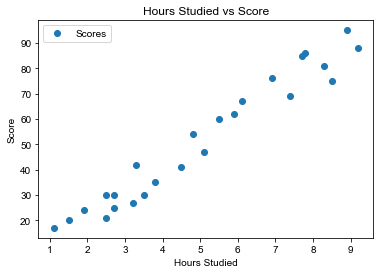

In [14]:
#plotting 2D graph depicting the distribution of scores and hours studied
data.plot(x='Hours',y='Scores',title='Hours Studied vs Score' ,style='o')
plt.style.use('seaborn')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show(block=True)

In [15]:
data.corr(method='pearson') #calculating pearson's correlation coefficient

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


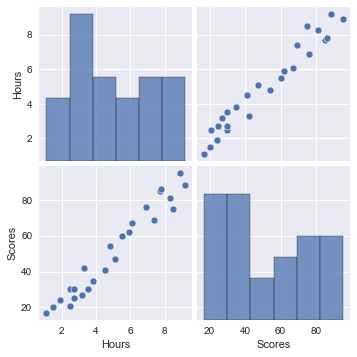

In [16]:
sb.pairplot(data) #to show pairwise relationship in the dataset "data"

# PREPARING THE DATA
### Dividing the data into "attributes" (inputs) and "labels" (outputs)

In [17]:
t=data.iloc[:,: -1].values
print(t)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [18]:
s=data.iloc[:, 1].values
print(s)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Spliting into training and test sets.
### (Using Scikit-Learn)

In [21]:
from sklearn.model_selection import train_test_split
t_train,t_test,s_train,s_test=train_test_split(t,s,test_size=0.2,random_state=0)

#80% of the data - training set , 20% of the data - test set

## TRAINING THE  ALGORITHM

In [22]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(t_train,s_train)
print('Training Complete')

Training Complete


In [24]:
q=regressor.intercept_
print('Intercept of the regression line is: ',q) #intercept
r=regressor.coef_
print('Slope of the regression line is: ',r) #slope

Intercept of the regression line is:  2.018160041434662
Slope of the regression line is:  [9.91065648]


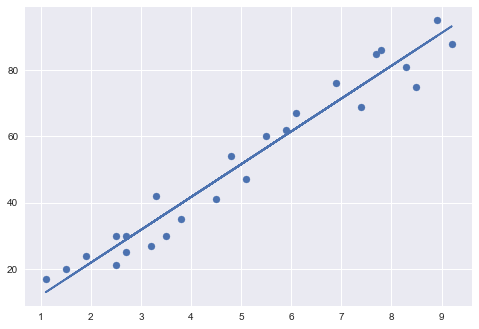

In [25]:
line=r*t+q  #plotting regression line

#plotting test data
plt.scatter(t,s)
plt.plot(t,line)
plt.show()

# PREDICTING

In [26]:
print(t_test)
s_pre=regressor.predict(t_test)
print('Predicted Scores: ',s_pre)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Predicted Scores:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [27]:
#Actual vs Predicted
df=pd.DataFrame({'Actual':s_test,'Predicted':s_pre})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


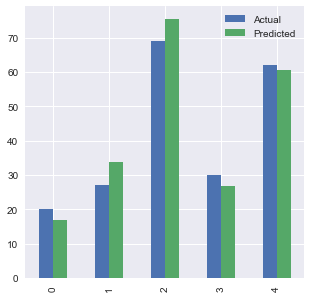

In [28]:
df.plot(kind='bar',figsize=(5,5))
plt.show()

# EVALUATING THE MODEL


#### For regression 3 evaluation metrics are used commonly :
#### 1. Mean Abolute Error
#### 2. Mean Squared Error
#### 3. Root Mean Sqaured Error

In [29]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(s_test,s_pre))
print('Mean Squared Error: ',metrics.mean_squared_error(s_test,s_pre))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(s_test,s_pre)))


Mean Absolute Error:  4.183859899002982
Mean Squared Error:  21.598769307217456
Root Mean Squared Error:  4.647447612100373


## Ques : Predicted score if a student studies for 9.25 hrs/day ?

In [30]:
hours=[[9.25]]
own_pre=regressor.predict(hours)
print('Number of Hours={}'.format(hours[0][0]) )
print('Predicted Score={}'.format(own_pre[0]))

Number of Hours=9.25
Predicted Score=93.69173248737539
